# Decision Tree Exercise

In [11]:
import pandas as pd # Data processing
import numpy as np # Linear algebra
import graphviz # visualization of leaf nodes

import matplotlib.pyplot as plt # Plotting data and visualizing data
import seaborn as sns # Statistical data visualization
%matplotlib inline 

# ML for regression
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Control Display
pd.options.display.max_columns = 50
sns.set(style = 'darkgrid',rc={'axes.facecolor': '#CAF1DE'})


# Read the dataset from CSV
df = pd.read_csv("heart_disease.csv")
df


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [12]:
# Show number of people with and without heart disease
df.target.value_counts()

target
1    526
0    499
Name: count, dtype: int64

In [22]:
# Showing percentage of both male and female patients
count_female = len(df[df.sex == 0])
count_male = len(df[df.sex == 1])  # Change 0 to 1 for males

total_patients = len(df)

percentage_female = (count_female / total_patients) * 100
percentage_male = (count_male / total_patients) * 100

# Round off percentages to 4 decimal places
percentage_female_rounded = round(percentage_female, 4)
percentage_male_rounded = round(percentage_male, 4)

print(f"Percentage of female patients: {percentage_female_rounded:.4f}%")
print(f"Percentage of male patients: {percentage_male_rounded:.4f}%")


Percentage of female patients: 30.4390%
Percentage of male patients: 69.5610%


In [23]:
# Finding Mean
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.569138,0.827655,0.482966,134.106212,251.292585,0.164329,0.456914,139.130261,0.549098,1.600200,1.166333,1.158317,2.539078
1,52.408745,0.570342,1.378327,129.245247,240.979087,0.134981,0.598859,158.585551,0.134981,0.569962,1.593156,0.370722,2.119772


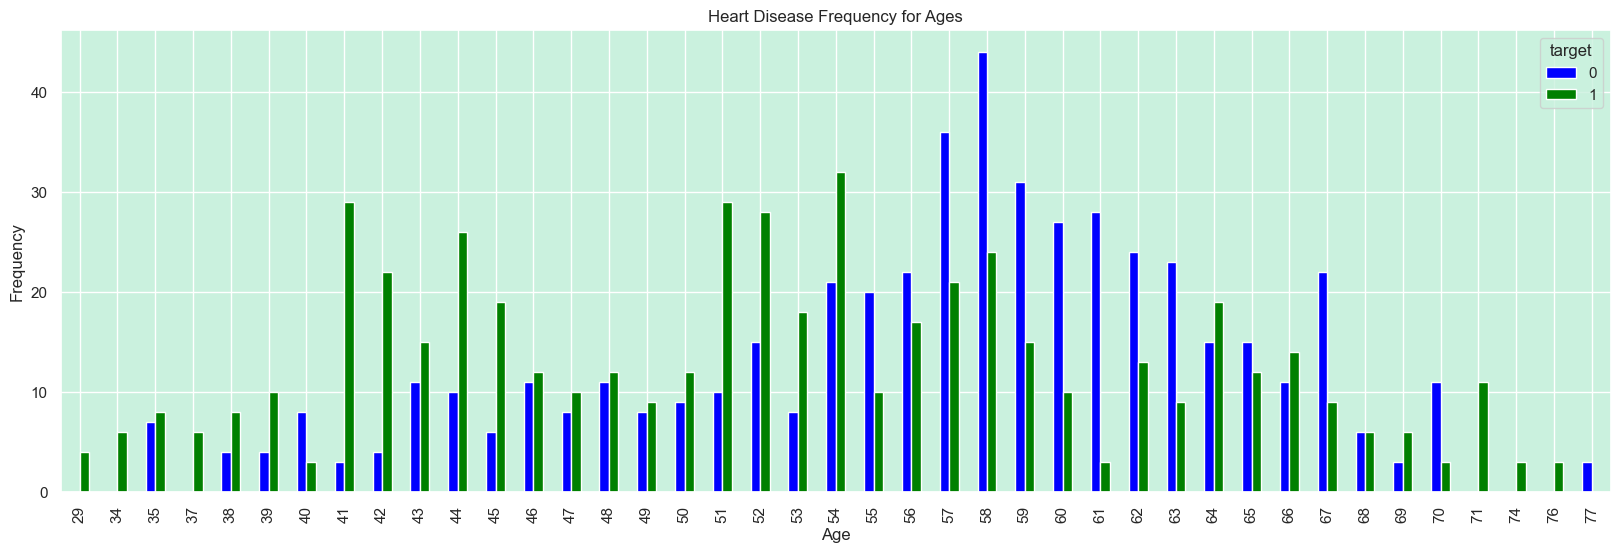

In [45]:
# Barplot showing heart disease frequency of age
pd.crosstab(df.age, df.target).plot(kind='bar', figsize = (20,6), color= ['blue', 'green'])
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

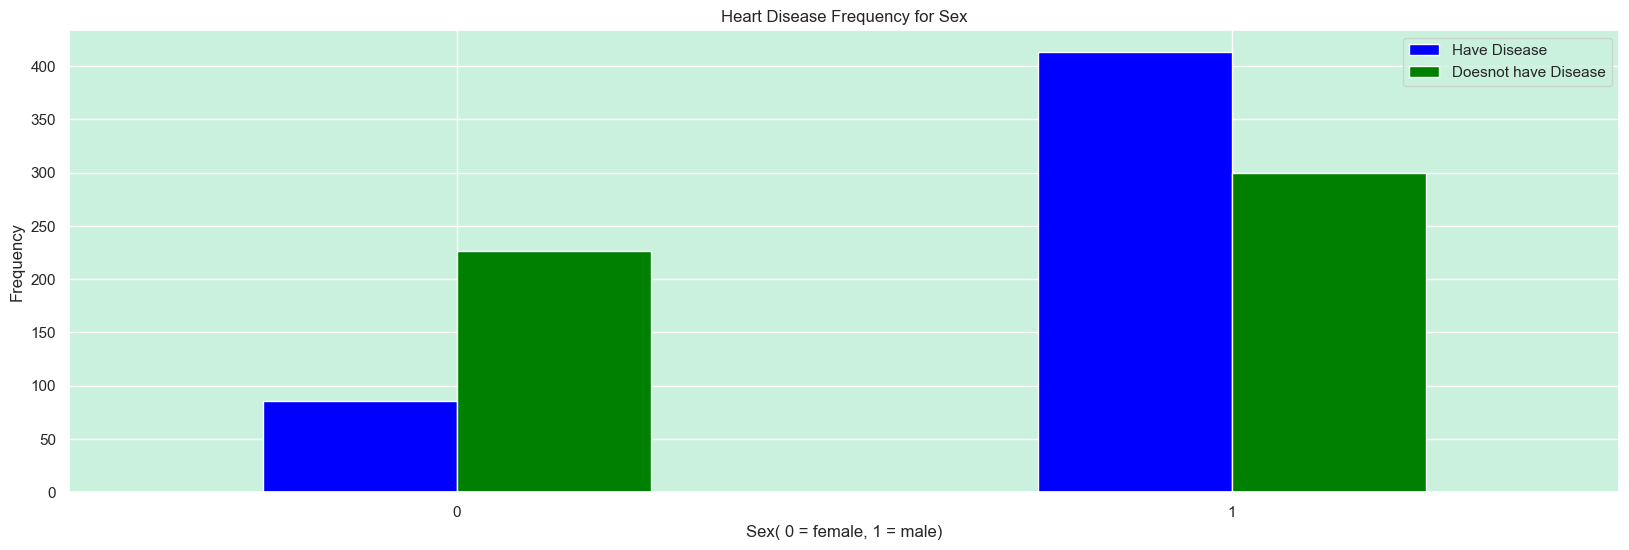

In [46]:
# Barplot showing heart disease frequency for sex
pd.crosstab(df.sex, df.target).plot(kind='bar', figsize = (20,6), color= ['blue', 'green'])
plt.title('Heart Disease Frequency for Sex')
plt.legend(['Have Disease', 'Doesnot have Disease'])
plt.xlabel('Sex( 0 = female, 1 = male)')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

In [24]:
# Show for Null or Nan values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [27]:
# Create Logistic Regression
y = df.target.values
x_data = df.drop(['target'], axis = 1)

In [29]:
# Split data for training 65% and testing 35%
x_train, x_test, y_train, y_test = train_test_split(x_data,y, test_size = 0.35, random_state= 42)

In [30]:
# check shape  of data remaining after splitting for training and testing
x_train.shape, x_test.shape

((666, 13), (359, 13))

In [31]:
# Check data types 
x_train.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
dtype: object

In [32]:
# check x_train header
x_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
867,41,1,1,110,235,0,1,153,0,0.0,2,0,2
954,53,0,0,130,264,0,0,143,0,0.4,1,0,2
551,54,1,0,122,286,0,0,116,1,3.2,1,2,2
548,51,0,2,120,295,0,0,157,0,0.6,2,0,2
947,54,0,2,160,201,0,1,163,0,0.0,2,1,2


In [33]:
clf_gini = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state = 0)
clf_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [35]:
# Predict the class label for the test data using the decision tree classifier
y_pred_gini = clf_gini.predict(x_test)

from sklearn.metrics import accuracy_score
print('Model accuracy score with criterion gini index:{0:0.4f} '. format(accuracy_score (y_test,y_pred_gini)))

Model accuracy score with criterion gini index:0.8162 


In [36]:
# Predict the class label for training data using decision tree classifier
y_pred_train_gini = clf_gini.predict(x_train)
y_pred_train_gini 

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,

In [38]:
# Print training and testing set of accuracy score
print('Training.set accuracy score: {0:0.4f}'.format(clf_gini.score(x_train, y_train)))
print('Testing.set accuracy score: {0:0.4f}'.format(clf_gini.score(x_test, y_test)))

Training.set accuracy score: 0.8619
Testing.set accuracy score: 0.8162


[Text(0.5, 0.875, 'X[2] <= 0.5\ngini = 0.499\nsamples = 666\nvalue = [319, 347]'),
 Text(0.25, 0.625, 'X[11] <= 0.5\ngini = 0.384\nsamples = 324\nvalue = [240, 84]'),
 Text(0.125, 0.375, 'X[12] <= 2.5\ngini = 0.498\nsamples = 144\nvalue = [68, 76]'),
 Text(0.0625, 0.125, 'gini = 0.347\nsamples = 85\nvalue = [19, 66]'),
 Text(0.1875, 0.125, 'gini = 0.282\nsamples = 59\nvalue = [49, 10]'),
 Text(0.375, 0.375, 'X[3] <= 109.0\ngini = 0.085\nsamples = 180\nvalue = [172, 8]'),
 Text(0.3125, 0.125, 'gini = 0.48\nsamples = 10\nvalue = [6, 4]'),
 Text(0.4375, 0.125, 'gini = 0.046\nsamples = 170\nvalue = [166, 4]'),
 Text(0.75, 0.625, 'X[9] <= 1.95\ngini = 0.355\nsamples = 342\nvalue = [79, 263]'),
 Text(0.625, 0.375, 'X[12] <= 2.5\ngini = 0.286\nsamples = 307\nvalue = [53, 254]'),
 Text(0.5625, 0.125, 'gini = 0.187\nsamples = 239\nvalue = [25, 214]'),
 Text(0.6875, 0.125, 'gini = 0.484\nsamples = 68\nvalue = [28, 40]'),
 Text(0.875, 0.375, 'X[10] <= 0.5\ngini = 0.382\nsamples = 35\nvalue = [26,

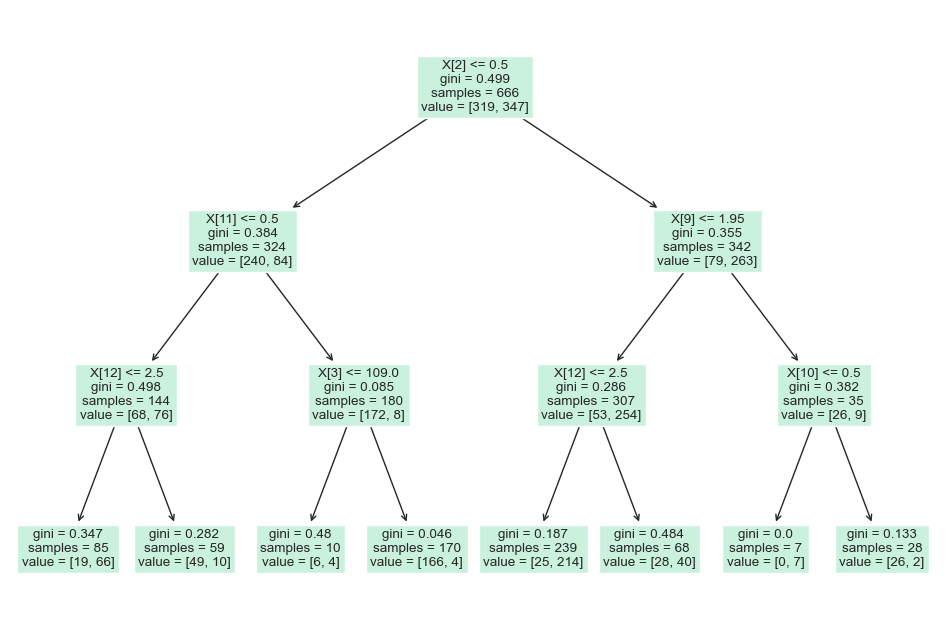

In [48]:
# First way to visualise Decision Tree Leaf Node
plt.figure(figsize = (12,8)) # Create figure for width and height
from sklearn import tree
tree.plot_tree(clf_gini.fit(x_train, y_train))

In [43]:
# Second way to visualize 
y = df['target'].values
x_data = df.drop(['target'], axis = 1)

# Train the decision tree classifier 
model= tree.DecisionTreeClassifier()
model.fit(x_data, y)

# Get the classname from the dataset
class_names = df['target'].unique().astype(str)

# Generate the graphviz visualization
tree.export_graphviz(model, out_file = "heart_disease1.dot",
                    feature_names = x_data.columns,
                    class_names=class_names,
                    label='all',
                    filled=True, rounded=True)